# Mini-projet SD-WAN : Routage intelligent avec Python (Dijkstra)

## Objectif
- Modéliser la topologie SD-WAN sous forme de **graphe pondéré** :
  - Routeurs = **nœuds**
  - Liaisons = **arêtes**
  - Latence (ms) = **poids** (`weight`)
- Utiliser **Dijkstra** pour trouver le **chemin optimal** entre une source et une destination
  (chemin qui minimise la somme des latences).
- Afficher :
  - Le chemin optimal
  - La latence totale
  - Le RTT estimé (aller-retour)
- Bonus :
  - Tableau des liens (DataFrame)
  - Saisie interactive (source/destination)
  - Visualisation du graphe + surlignage du chemin optimal


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
def build_graph():
    """
    Construit le graphe non orienté pondéré.
    weight = latence en ms
    """
    G = nx.Graph()

    edges = [
        ("R1", "R2", 20), ("R1", "R3", 45), ("R1", "R4", 10),
        ("R2", "R3", 15), ("R2", "R5", 50),
        ("R3", "R5", 30), ("R3", "R6", 10),
        ("R4", "R6", 65),
        ("R5", "R7", 20), ("R5", "R8", 100),
        ("R6", "R7", 25),
        ("R7", "R8", 15)
    ]

    G.add_weighted_edges_from(edges, weight="weight")
    return G


In [10]:
def shortest_path_latency(G, source, target):
    """
    Calcule le chemin optimal (Dijkstra) et la latence totale.
    """
    path = nx.dijkstra_path(G, source, target, weight="weight")
    latency = nx.dijkstra_path_length(G, source, target, weight="weight")
    return path, latency


In [11]:
def draw_graph_with_optimal_path(G, path=None, title="Topologie SD-WAN (chemin optimal)"):
    """
    Dessine le graphe et surligne le chemin optimal.
    """
    # Positionnement manuel (proche du schéma)
    pos = {
        "R1": (0, 0),
        "R2": (1, 1),
        "R4": (1, -1),
        "R3": (2, 0.2),
        "R5": (3, 1),
        "R6": (3, -0.8),
        "R7": (4, 0),
        "R8": (5, 0),
    }

    edge_labels = nx.get_edge_attributes(G, "weight")

    plt.figure(figsize=(10, 4))
    nx.draw_networkx_nodes(G, pos, node_size=900)
    nx.draw_networkx_labels(G, pos, font_weight="bold")

    # Arêtes normales
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    # Surligner le chemin optimal
    if path and len(path) >= 2:
        optimal_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=optimal_edges, width=4)

    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()


## Résumé – Partie Implémentation (Python)

La topologie SD-WAN est modélisée comme un **graphe pondéré** :
- Routeurs (R1…R8) = **nœuds**
- Liaisons = **arêtes**
- Latence (ms) = **poids** (`weight`)

L’algorithme **Dijkstra** calcule le **chemin optimal** entre une source et une destination :
- Chemin optimal = celui qui **minimise la somme des latences**
- Le programme retourne :
  - Le **chemin** (suite de routeurs)
  - La **latence totale**
  - Le **RTT estimé** (aller-retour = 2 × latence)

Bonus :
- Un **tableau (DataFrame)** affiche tous les liens et latences (vérification des données).
- Une **visualisation** surligne le chemin optimal dans la topologie.


=== Routage Intelligent SD-WAN (Dijkstra) ===
Source       : R1
Destination  : R8
Chemin optimal : R1 -> R2 -> R3 -> R6 -> R7 -> R8
Latence totale : 85 ms
RTT estimé (aller-retour) : 170 ms


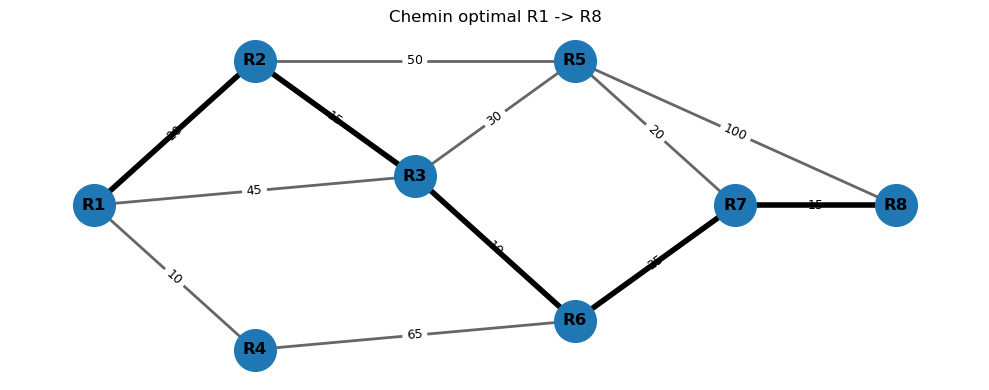

In [12]:
G = build_graph()

source, target = "R1", "R8"
path, latency = shortest_path_latency(G, source, target)

print("=== Routage Intelligent SD-WAN (Dijkstra) ===")
print(f"Source       : {source}")
print(f"Destination  : {target}")
print(f"Chemin optimal : {' -> '.join(path)}")
print(f"Latence totale : {latency} ms")
print(f"RTT estimé (aller-retour) : {2*latency} ms")

draw_graph_with_optimal_path(G, path=path, title=f"Chemin optimal {source} -> {target}")


In [13]:
edges_data = []
for u, v, d in G.edges(data=True):
    edges_data.append({"Noeud_1": u, "Noeud_2": v, "Latence_ms": d["weight"]})

df_edges = pd.DataFrame(edges_data).sort_values(by=["Noeud_1", "Noeud_2"]).reset_index(drop=True)
df_edges


,Noeud_1,Noeud_2,Latence_ms
0,R1,R2,20
1,R1,R3,45
2,R1,R4,10
3,R2,R3,15
4,R2,R5,50
5,R3,R5,30
6,R3,R6,10
7,R4,R6,65
8,R5,R7,20
9,R5,R8,100


In [14]:
print("Noeuds disponibles :", sorted(G.nodes()))


Noeuds disponibles : ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']


Entrer la source (ex: R1) :  R2
Entrer la destination (ex: R8) :  R7



Chemin optimal : R2 -> R3 -> R6 -> R7
Latence totale : 50 ms
RTT estimé : 100 ms


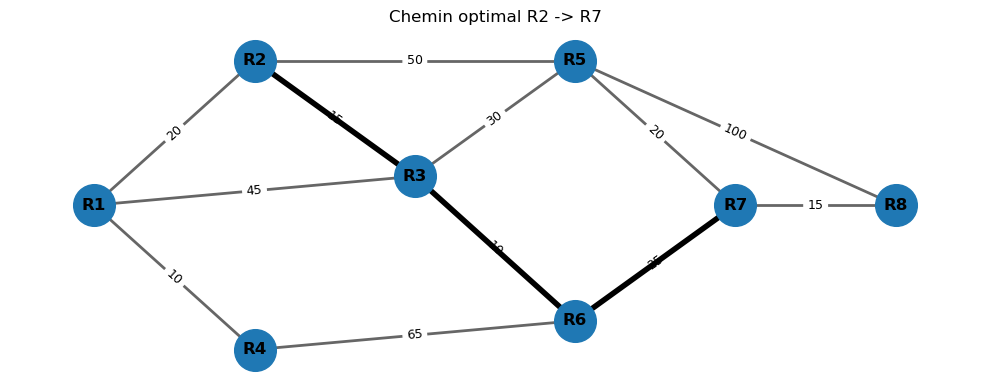

In [15]:
source = input("Entrer la source (ex: R1) : ").strip().upper()
target = input("Entrer la destination (ex: R8) : ").strip().upper()

if source not in G.nodes() or target not in G.nodes():
    print("Erreur : source ou destination invalide.")
    print("Noeuds valides :", sorted(G.nodes()))
else:
    path, latency = shortest_path_latency(G, source, target)
    print(f"\nChemin optimal : {' -> '.join(path)}")
    print(f"Latence totale : {latency} ms")
    print(f"RTT estimé : {2*latency} ms")
    draw_graph_with_optimal_path(G, path=path, title=f"Chemin optimal {source} -> {target}")
